# Recording a Gesture for Shimi

First, run the cell below to instatiate the shimi object. It should move to its initial positions and then relax.

In [1]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from shimi import *
from motion.move import *
from config.definitions import *
from motion.recorder import *
from motion.playback import *
from audio.audio import *
from posenet.posenet import *

import time
import datetime

from copy import deepcopy

import os

import threading

# Load Shimi
shimi = Shimi()

local_gestures = {}

Connecting on /dev/tty.usbmodem1431
Found motors with the following IDs: [1, 2, 3, 4, 5]
(OrderedDict([('model', 'MX-28'),
              ('firmware', 30),
              ('id', 1),
              ('baudrate', 1),
              ('return delay time', 0),
              ('angle limit', (-99.03, 14.64)),
              ('highest temperature limit', 80.0),
              ('voltage limit', (6.0, 16.0)),
              ('max torque', 100.0),
              ('status return level', 'always'),
              ('alarm LED', ('Overload Error', 'Overheating Error')),
              ('alarm shutdown', ('Overload Error', 'Overheating Error')),
              ('torque_enable', True),
              ('LED', False),
              ('pid gain', (0.0, 0.0, 4.0)),
              ('goal position', 7.08),
              ('moving speed', 61.56),
              ('torque limit', 100.0),
              ('present position', 6.37),
              ('present speed', 0.0),
              ('present load', -5.5),
              ('present 

The cell below defines the recorder object. The first parameter is a reference to the motor controller, the second is a **list** of motor ids, referenced by a convenience property on `shimi`. The options are as follows:
* `shimi.torso`
* `shimi.neck_lr`
* `shimi.neck_ud`
* `shimi.phone`
* `shimi.foot`
* `shimi.all_motors`: this **returns a list**, so you don't need to wrap it in one in this call


The final parameter is the duration for which you want to record.

In [ ]:
r = Recorder(shimi, shimi.all_motors, 3.0)

This starts a recording. It will count down from 3 to let you know when the recording starts, then move Shimi as you want it to move. **The first thing this call does is relax the motors, so be sure it doesn't collapse on itself when you call this.**

In [ ]:
r.record()
r.plot(plt.axes())

Then, run this to play back the recorded gesture.

In [ ]:
r.play(plt.axes())

### Here are some helper functions.

In [ ]:
# Puts shimi in a neutral position with motors non-compliant
shimi.initial_position()

## **Make sure Shimi will not collapse before you run this!!!**

In [ ]:
# Makes the motors compliant
shimi.disable_torque()

### Here's a hard-coded demo of Shimi dancing to Hey Ya

In [ ]:
play_outkast(shimi)

In [2]:
p = PoseNet(shimi)

Listening for OSC at 127.0.0.1 on port 8000
Starting PoseNet...
Receiving from PoseNet...


In [3]:
p.record()

3.0...
2.0...
1.0...
Recording...
Done. Recorded 19 positions.


Setting positions {1: -29.153086959204686, 3: -12.974972485346287}
Setting positions {3: -8.959937643780126}
Setting positions {3: -35.86285827376845}
Setting positions {1: -12.048969402331887}
Setting positions {1: -61.67370918713941}
Setting positions {3: 11.070917328686551}
Setting positions {1: -38.06494123205074}
Setting positions {1: -89.46403135493956}
Setting positions {3: -49.8843975295321}
Setting positions {1: 15.592116409606778}
Setting positions {3: 9.914723843776766}
Setting positions {1: -44.43895386573137}
Setting positions {1: 14.584826034879391, 3: 9.769910224774641}


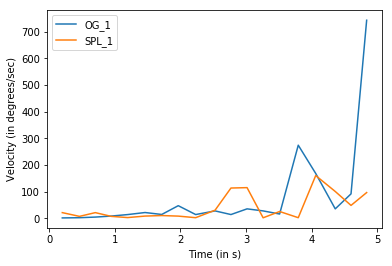

In [4]:
p.play(None, plt.axes())

In [5]:
p.stop_posenet()

Stopping PoseNet...


In [ ]:
m = LinearMove(shimi, shimi.torso, 1.0, 1.0, normalized_positions=True)
m.start()

In [ ]:
r.timestamps

In [ ]:
total = 0.0
avg = 0.0
for i in range(100):
    s = time.time()
    shimi.controller.get_present_position(shimi.all_motors)
    shimi.controller.get_present_speed(shimi.all_motors)
    total += (time.time() - s)
    avg = total / (i + 1.0)
print(avg)

In [ ]:
total = 0.0
avg = 0.0
for i in range(100):
    s = time.time()
    shimi.controller.set_goal_position(dict(zip(shimi.all_motors, [STARTING_POSITIONS[m] for m in shimi.all_motors])))
    shimi.controller.set_moving_speed(dict(zip(shimi.all_motors, [10.0 for m in shimi.all_motors])))
    total += (time.time() - s)
    avg = total / (i + 1.0)
print(avg)

In [ ]:
playback(shimi, r.motors, r.dur, r.timestamps, r.positions, r.velocities, plt.axes())